In [1]:
import sys, os
from time import time
if '../' not in sys.path:
    sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from modules.statistics import SummaryStatistics, CloneComparison
from modules.figures import ControlComparison, ChannelComparison

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# load data
data_path = '../data/clean_data.json'
with open(data_path, 'r') as f:
    all_data = pd.read_json(f)
df = all_data[all_data.genotype.isin((0,1,2))]        

# filter cells
print('before', len(df))
df = df[df.near_furrow==True]
df = df[~df.boundary]
df = df[df.concurrent_all]
print('after', len(df))

before 100394
after 13539


In [3]:
_ = SummaryStatistics(df, test='MW')

TEST: MW
Control: 0x vs 1x: 0.9063
Control: 1x vs 2x: 0.7506
Mutant: 0x vs 1x: 0.0000
Mutant: 1x vs 2x: 0.0000


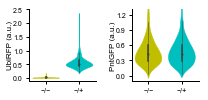

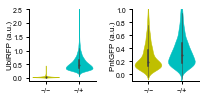

In [30]:
order = (0, 1)

control = df[df.experiment=='control']
control_comparison = ChannelComparison(control, order=order, name='control_0x_vs_1x', cut=1)
ax0, ax1 = control_comparison.fig.axes
ax0.set_ylim(-0.1, 2.5)
ax1.set_ylim(-0.1, 1.3)
ax0.set_yticks(np.arange(0, 2.5+.1, .5))
ax1.set_yticks(np.arange(0, 1.4+.1, .3))
plt.tight_layout()

perturbation = df[df.experiment=='perturbation']
perturbation_comparison = ChannelComparison(perturbation, order=order, name='perturbation_0x_vs_1x', cut=1)
ax0, ax1 = perturbation_comparison.fig.axes
ax0.set_ylim(-0.1, 2.5)
ax1.set_ylim(-0.1, 1.)
ax0.set_yticks(np.arange(0, 2.5+.1, .5))
ax1.set_yticks(np.arange(0, 1+.1, .2))
plt.tight_layout()

# control_comparison.save()
# perturbation_comparison.save()

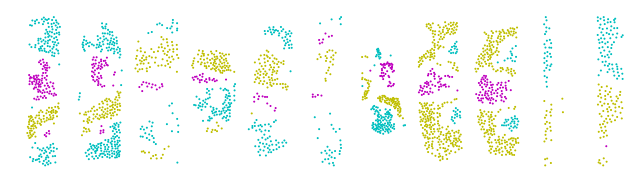

In [29]:
gb = control.groupby(('experiment', 'disc_id', 'layer'))
N = len(gb)
fig, axes = plt.subplots(ncols=N, figsize=(N, 3))

for i, (index, layer) in enumerate(gb):
    ax = axes[i]
    
    color_dict = {0: 'y', 1: 'c', 2: 'm'}
    c = np.vectorize(color_dict.get)(layer.genotype)
    ax.scatter(layer.centroid_x, layer.centroid_y, c=c, s=1)
    ax.set_aspect(1)
    ax.axis('off')